In [1]:
import numpy as np 
import matplotlib.pyplot as plt

def vol_frac(d, d_min, lam, eta):
    return (((d/d_min) - 1) / (lam - 1))**eta

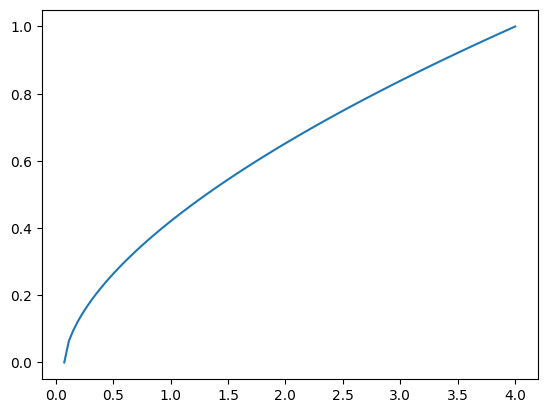

In [2]:
# from Oquendo‐Patiño et al. (2019) volume fraction equation 
d_min = 0.075 # mm
d_max = 4 # mm
lam = d_max/d_min
eta = 0.6

d = np.linspace(d_min, d_max, 100)
vols = vol_frac(d, d_min, lam, eta)

plt.plot(d, vols)

In [3]:
# for the sieve sizes available, find the representative particle radius
# sieve numbers: 10, 20, 40, 60, 80, 100, 200

def p_analytical(r_low, r_high):
    return (2-4**(1/3))*(r_low/r_high) + 4**(1/3)


sieve_numbers = [4, 10, 20, 40, 60, 80, 100, 200]
sieve_opening = np.array([5000, 2000, 850, 425, 300, 180, 150, 75] )# microns
r_mins = np.append(sieve_opening[1:],25)/2
r_maxs = sieve_opening/2
r_reps = r_mins + (r_maxs - r_mins)/p_analytical(r_mins, r_maxs)
d_reps = 2*r_reps

print(d_reps)

[3711.89822161 1502.38765761  661.94033304  366.53723424  245.39650591
  165.53411323  116.81299995   53.98661572]


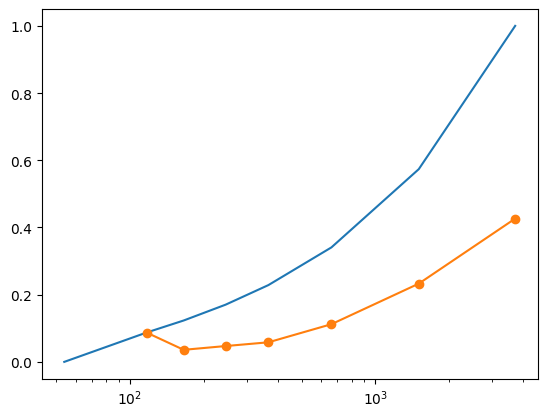

In [4]:
# apply the volume fraction equation to the representative particle sizes
d_min = min(d_reps) # mm
d_max = max(d_reps) # mm
lam = d_max/d_min
eta = 0.6

cdf_vols = vol_frac(d_reps, d_min, lam, eta)
pdf_vols = np.diff(cdf_vols[::-1])[::-1]

plt.semilogx(d_reps, cdf_vols, d_reps[:-1], pdf_vols,"-o")

In [6]:
print(pdf_vols)
print(cdf_vols)

[0.42642083 0.23287113 0.11214169 0.05825692 0.04713063 0.03589266
 0.08728615]
[1.         0.57357917 0.34070804 0.22856635 0.17030943 0.1231788
 0.08728615 0.        ]


In [7]:
np.round(pdf_vols*150)

array([64., 35., 17.,  9.,  7.,  5., 13.])

In [8]:
np.round(d_reps)*0.41

array([1521.92,  615.82,  271.42,  150.47,  100.45,   68.06,   47.97,
         22.14])

In [9]:
for j in range(len(d_reps)-1):
    i = j+1
    print(f"{sieve_numbers[i]}: {d_reps[j]:.0f} nm; weights: {pdf_vols[j]*150:.0f} g")

10: 3712 nm; weights: 64 g
20: 1502 nm; weights: 35 g
40: 662 nm; weights: 17 g
60: 367 nm; weights: 9 g
80: 245 nm; weights: 7 g
100: 166 nm; weights: 5 g
200: 117 nm; weights: 13 g


In [10]:
for j in range(len(d_reps)-1):
    i = j+1
    print(f"{sieve_numbers[i]}: {d_reps[j]:.0f} mm; largest nesting: {d_reps[j]*0.41:.0f} mm")

10: 3712 mm; largest nesting: 1522 mm
20: 1502 mm; largest nesting: 616 mm
40: 662 mm; largest nesting: 271 mm
60: 367 mm; largest nesting: 150 mm
80: 245 mm; largest nesting: 101 mm
100: 166 mm; largest nesting: 68 mm
200: 117 mm; largest nesting: 48 mm


In [11]:
# 10,40,80,200
nesting_ids = [0,1]
nesting_set = np.append(d_reps[:-1][nesting_ids],1)
print(nesting_set)

[3.71189822e+03 1.50238766e+03 1.00000000e+00]


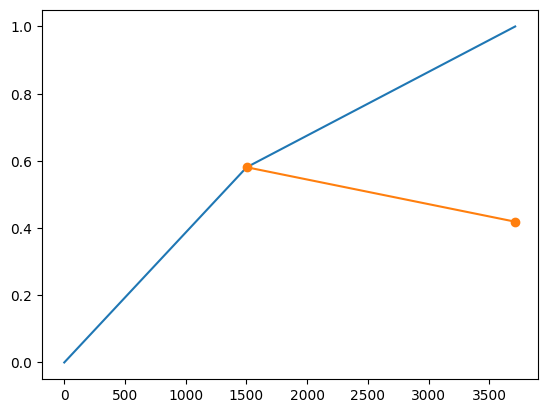

In [12]:
# apply the volume fraction equation to the representative particle sizes for the nesting set
d_min = min(nesting_set) # mm
d_max = max(nesting_set) # mm
lam = d_max/d_min
eta = 0.6

cdf_vols = vol_frac(nesting_set, d_min, lam, eta)
pdf_vols = np.diff(cdf_vols[::-1])[::-1]

plt.plot(nesting_set, cdf_vols, nesting_set[:-1], pdf_vols,"-o")

In [13]:

i = 0
for j in nesting_ids:
    print(f"{sieve_numbers[j+1]}: {d_reps[j]:.0f} nm; weight {pdf_vols[i]*150:.0f} g")
    i+=1

10: 3712 nm; weight 63 g
20: 1502 nm; weight 87 g
